In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py

In [2]:

hf = h5py.File('./Data/Data_if.h5', 'r')
hf.keys()
xh_box=hf.get('dataset')

xh_box.shape

(10820, 128, 128, 128)

In [3]:
hf = h5py.File('./Data/Data_bt.h5', 'r')
hf.keys()
temp_box=hf.get('dataset')

temp_box.shape

(10820, 128, 128, 128)

In [2]:
df= pd.read_csv('./Data/Data.csv')
df

,Redshift,Random Seed,Neutral Fraction
0,5.082006,8022474887,0.006888
1,4.425144,9057683783,0.000000
2,7.513517,1797830416,0.551732
3,7.056333,574511916,0.424388
4,7.588950,310269955,0.576773
...,...,...,...
10815,7.484047,4379400240,0.537273
10816,6.408221,453856848,0.229102
10817,5.962113,8423226450,0.091768
10818,5.383877,4055061346,0.042966


In [4]:
y_axis=np.array(df["Neutral Fraction"])[0:100]
x_axis=np.array(df["Redshift"])[0:100]

FileNotFoundError: [Errno 2] No such file or directory: 'redshift/neutral_scatter.jpg'

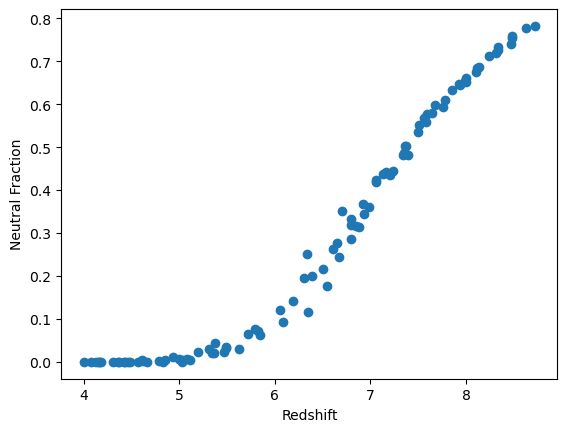

In [5]:
import matplotlib.pyplot as plt
import numpy as np



plt.scatter(x_axis, y_axis)
plt.xlabel("Redshift")
plt.ylabel("Neutral Fraction")
plt.savefig("redshift/neutral_scatter.jpg")

plt.show()

In [5]:
xh_box[0].shape

(128, 128, 128)

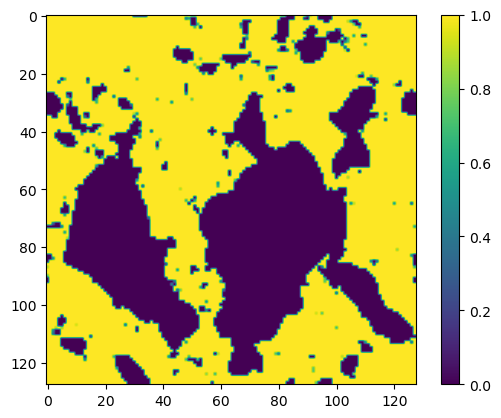

In [6]:
plt.imshow(xh_box[2,:,1])
plt.colorbar()

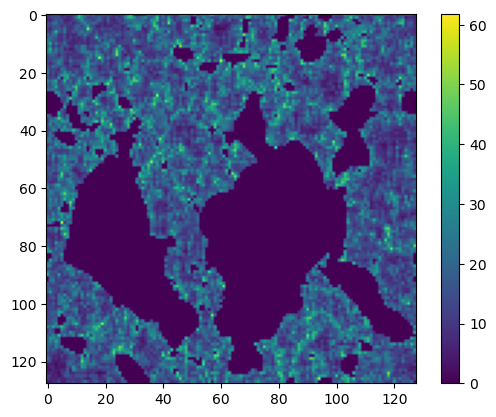

In [5]:
plt.imshow(temp_box[2,:,1])
plt.colorbar()

In [10]:
len(temp_box)

10820

In [18]:
def normalized(arr):
    if np.std(arr) != 0:
        arr=(arr - np.mean(arr)) / np.std(arr)
    return arr

In [19]:
t=temp_box[0:10]

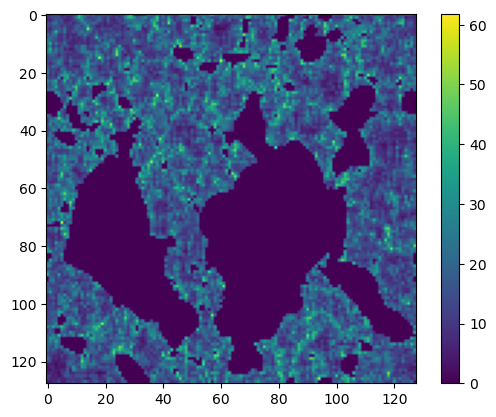

In [20]:
plt.imshow(t[2,:,1])
plt.colorbar()

In [21]:
for i in range(0,len(t)):
    t[i]=normalized(t[i])


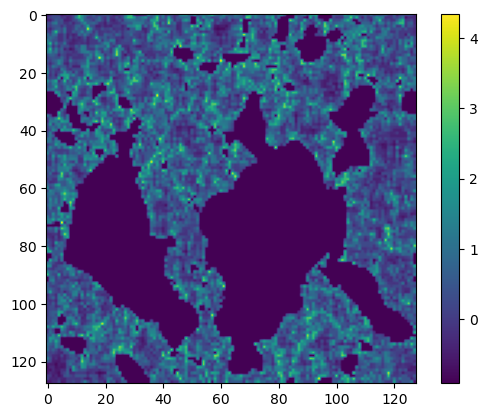

In [22]:
plt.imshow(t[2,:,1])
plt.colorbar()

In [1]:
fig, axes = plt.subplots(5,5, figsize = (16,16))
count=0
for i in range(5):
  for j in  range(5):
    axes[i,j].imshow(xh_box[3,:,count])
    count+=1

NameError: name 'plt' is not defined

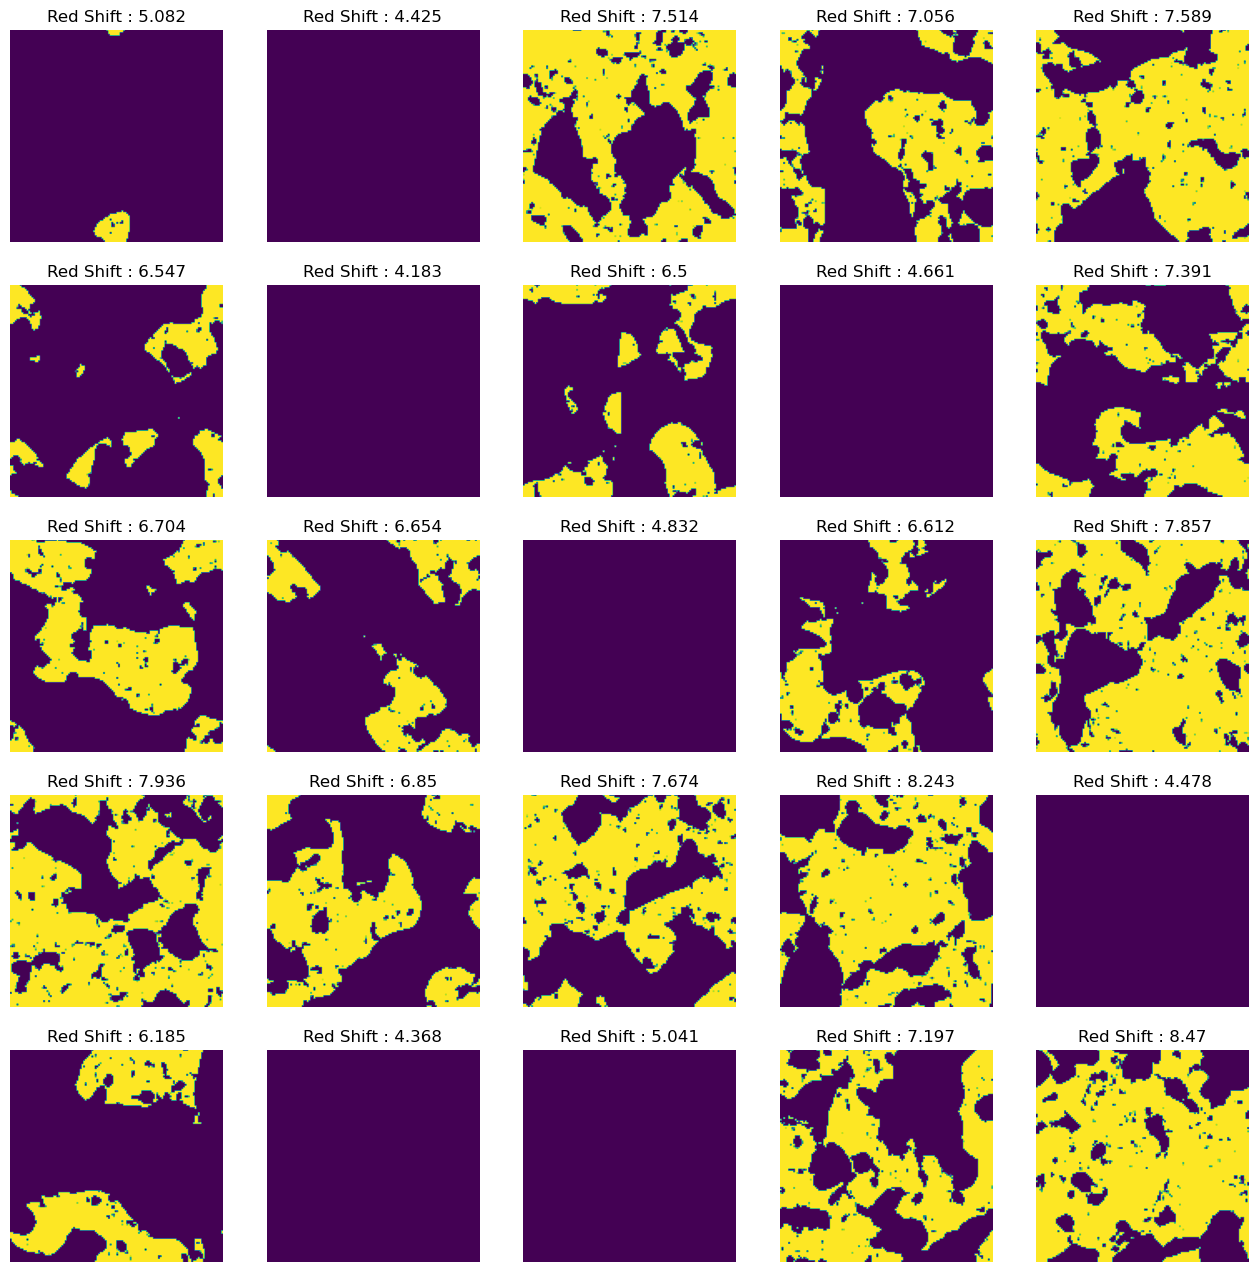

In [9]:
plt.figure(figsize=(16, 16))


for i in range(25):
    ax = plt.subplot(5,5, i+1)
    rs=round(df["Redshift"][i], 3)
    plt.imshow(xh_box[i,:,1])
    plt.title(f"Red Shift : {rs}")
        
    plt.axis("off")

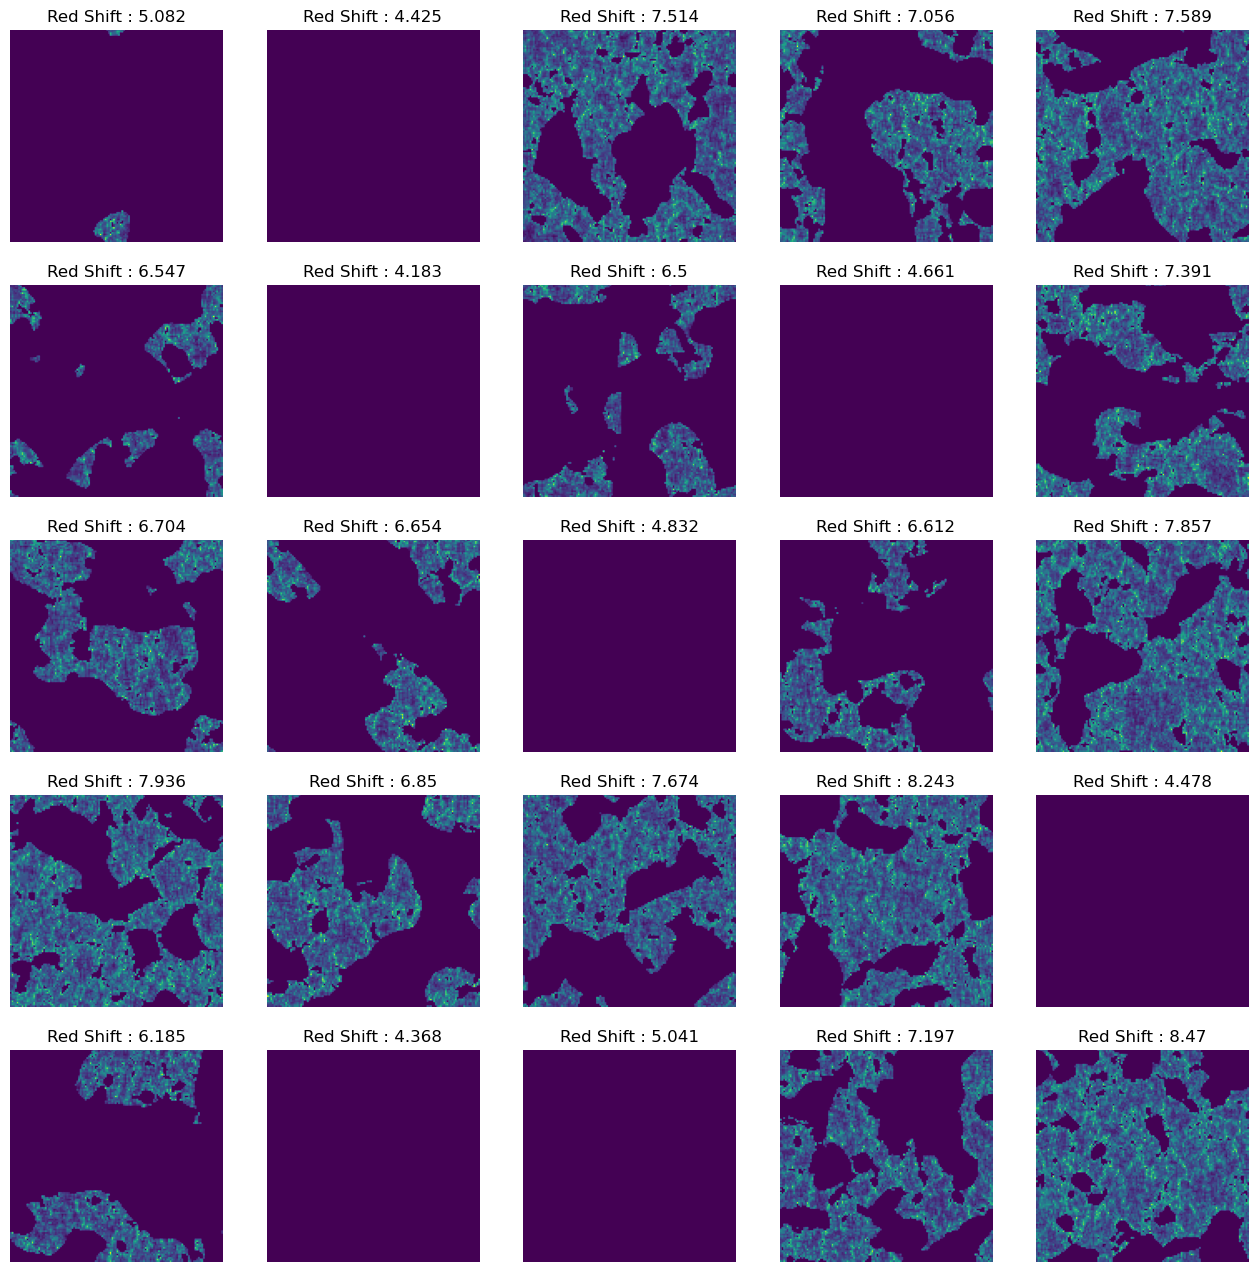

In [10]:
plt.figure(figsize=(16, 16))


for i in range(25):
    ax = plt.subplot(5,5, i+1)
    rs=round(df["Redshift"][i], 3)
    plt.imshow(temp_box[i,:,1])
    plt.title(f"Red Shift : {rs}")
        
    plt.axis("off")

Training

In [14]:
X=np.array(temp_box[0:100])

In [12]:
X.shape

(100, 128, 128, 128)

In [ ]:
y=np.array(df["Neutral Fraction"])[0:100]

In [40]:
X.shape

(100, 128, 128, 128)

In [42]:
y[0]

0.031325288

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
X_train = X_train.reshape(X_train.shape[0],128,128,128,1)
X_test = X_test.reshape(X_test.shape[0],128,128,128,1)

In [45]:
X_train.shape,X_test.shape

((90, 128, 128, 128, 1), (10, 128, 128, 128, 1))

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define input shape
input_shape = (128, 128, 128, 1)

# Define input layer
inputs = Input(shape=input_shape)

# Define convolutional layers
x = Conv3D(32, kernel_size=(3, 3, 3), activation='relu')(inputs)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Conv3D(64, kernel_size=(3, 3, 3), activation='relu')(x)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Conv3D(128, kernel_size=(3, 3, 3), activation='relu')(x)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)

# Define flatten layer
x = Flatten()(x)

# Define fully connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)

# Define model
model = Model(inputs=inputs, outputs=x)

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

# Print model summary
model.summary()

2023-03-07 23:42:38.095639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 23:42:38.865186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 23:42:38.865238: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 23:42:43.323637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 128, 1  0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 126, 126, 126, 32  896       
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 63, 63, 63, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 61, 61, 61, 64)    55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 30, 30, 30, 64)   0         
 3D)                                                         

In [47]:
history=model.fit(X_train,y_train ,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30


2023-03-07 23:43:04.750414: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 754974720 exceeds 10% of free system memory.
2023-03-07 23:43:06.729966: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 719323136 exceeds 10% of free system memory.


3/3 [==============================] - 1112s 358s/step - loss: 10968.0205 - mean_squared_error: 10968.0205 - val_loss: 43.9404 - val_mean_squared_error: 43.9404
Epoch 2/30
3/3 [==============================] - 1098s 352s/step - loss: 44.3528 - mean_squared_error: 44.3528 - val_loss: 2.0618 - val_mean_squared_error: 2.0618
Epoch 3/30
3/3 [==============================] - 1118s 360s/step - loss: 2.1270 - mean_squared_error: 2.1270 - val_loss: 1.0308 - val_mean_squared_error: 1.0308
Epoch 4/30
3/3 [==============================] - 1129s 366s/step - loss: 1.0592 - mean_squared_error: 1.0592 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 5/30
2/3 [===================>..........] - ETA: 6:28 - loss: 0.1526 - mean_squared_error: 0.1526 

KeyboardInterrupt: 

In [49]:
filename="3DCNN_test"
model.save("./models/"+filename+".h5",save_format='h5')

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
y_pred=model.predict(X_test)
y_true=y_test

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# R-squared score (R2)
r2 = r2_score(y_true, y_pred)
print("R-squared score (R2): ", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Explained Variance Score (EVS)
evs = explained_variance_score(y_true, y_pred)
print("Explained Variance Score (EVS): ", evs)

1/1 [==============================] - 2s 2s/step
Mean Squared Error (MSE):  0.012095907938234651
Root Mean Squared Error (RMSE):  0.10998139814638952
R-squared score (R2):  0.9135022040697419
Mean Absolute Error (MAE):  0.09623309266428667
Explained Variance Score (EVS):  0.9154609237758411
